<a href="https://colab.research.google.com/github/MatheusHenriqueDaSilva/data_science/blob/main/pro_acoes_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.model_selection import train_test_split
import yaml
import shap

##!pip install pandas pyarrow fastparquet

In [2]:
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]
ANOS=[2018,2019,2020,2021,2022,2023,2024]
dados = {}  # Dicionário para armazenar os DataFrames

for ano in ANOS:
  dados[f'data_{ano}'] = pd.read_fwf(f'/content/COTAHIST_A{ano}.TXT', widths=tamanho_campos, header=0)

  ## Nomear as colunas

  dados[f'data_{ano}'].columns = [
  "tipo_registro",
  "data_pregao",
  "cod_bdi",
  "cod_negociacao",
  "tipo_mercado",
  "noma_empresa",
  "especificacao_papel",
  "prazo_dias_merc_termo",
  "moeda_referencia",
  "preco_abertura",
  "preco_maximo",
  "preco_minimo",
  "preco_medio",
  "preco_ultimo_negocio",
  "preco_melhor_oferta_compra",
  "preco_melhor_oferta_venda",
  "numero_negocios",
  "quantidade_papeis_negociados",
  "volume_total_negociado",
  "preco_exercicio",
  "ìndicador_correcao_precos",
  "data_vencimento" ,
  "fator_cotacao",
  "preco_exercicio_pontos",
  "codigo_isin",
  "num_distribuicao_papel"]

  # Eliminar a última linha
  linha=len(dados[f'data_{ano}']["data_pregao"])
  dados[f'data_{ano}']=dados[f'data_{ano}'].drop(linha-1)

  # Ajustar valores com virgula (dividir os valores dessas colunas por 100)
  listaVirgula=[
  "preco_abertura",
  "preco_maximo",
  "preco_minimo",
  "preco_medio",
  "preco_ultimo_negocio",
  "preco_melhor_oferta_compra",
  "preco_melhor_oferta_venda",
  "volume_total_negociado",
  "preco_exercicio",
  "preco_exercicio_pontos"
  ]

  for coluna in listaVirgula:
      dados[f'data_{ano}'][coluna]=[i/100. for i in dados[f'data_{ano}'][coluna]]

  dados[f'data_{ano}'] = dados[f'data_{ano}'][(dados[f'data_{ano}']['tipo_mercado']==10) & (dados[f'data_{ano}']['cod_negociacao'] == 'ITUB4')]


FileNotFoundError: [Errno 2] No such file or directory: '/content/COTAHIST_A2018.TXT'

In [3]:
data_itub4_save =  pd.concat([dados[f'data_2018'],dados[f'data_2019'],dados[f'data_2020'],dados[f'data_2021'],dados[f'data_2022'],dados[f'data_2023'],dados[f'data_2024']], axis = 0).reset_index()
data_itub4_save.to_parquet("data_itub4.parquet", engine="pyarrow", index=False)


NameError: name 'dados' is not defined

In [5]:
data_itub4 = pd.read_parquet("data_itub4.parquet", engine="pyarrow").reset_index(drop=True)
data_itub4.head()

,index,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1016,1,20180102,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,30810.0,11100600.0,483649086.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
1,3099,1,20180103,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,18377.0,14863800.0,654269523.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
2,5397,1,20180104,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,28294.0,15481700.0,696661801.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
3,7763,1,20180105,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,19882.0,10478300.0,472439105.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0
4,10039,1,20180108,2.0,ITUB4,10,ITAUUNIBANCO,PN ED N1,NaN,R$,...,20228.0,8472100.0,381831069.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,232.0


In [4]:
data_itub4.tail(
)

,index,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
1681,1347607,1,20241007,2.0,ITUB4,10,ITAUUNIBANCO,PN EJ N1,NaN,R$,...,22970.0,23310400.0,818620449.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0
1682,1349245,1,20241008,2.0,ITUB4,10,ITAUUNIBANCO,PN EJ N1,NaN,R$,...,33539.0,23103400.0,817031494.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0
1683,1351069,1,20241009,2.0,ITUB4,10,ITAUUNIBANCO,PN EJ N1,NaN,R$,...,35673.0,20924100.0,729268413.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0
1684,1352647,1,20241010,2.0,ITUB4,10,ITAUUNIBANCO,PN EJ N1,NaN,R$,...,27883.0,20487100.0,713223496.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0
1685,1354390,1,20241011,2.0,ITUB4,10,ITAUUNIBANCO,PN N1,NaN,R$,...,29848.0,16965500.0,588880130.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1,342.0


In [6]:
def generate_metadata(dataframe):

    metadata2 = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata2=metadata2.sort_values(by='tipo')
    metadata2 = metadata2.reset_index(drop=True)

    return metadata2

metadados = generate_metadata(data_itub4)
metadados.head(50)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,index,int64,0,0.0,1686
1,tipo_registro,int64,0,0.0,1
2,tipo_mercado,int64,0,0.0,1
3,preco_exercicio_pontos,float64,0,0.0,1
4,fator_cotacao,float64,0,0.0,1
5,data_vencimento,float64,0,0.0,1
6,ìndicador_correcao_precos,float64,0,0.0,1
7,preco_exercicio,float64,0,0.0,1
8,volume_total_negociado,float64,0,0.0,1686
9,quantidade_papeis_negociados,float64,0,0.0,1682


# Nova seção

In [7]:
lista_spec = ['quantidade_papeis_negociados','numero_negocios','preco_melhor_oferta_venda','preco_melhor_oferta_compra',
              'preco_medio','preco_minimo','preco_maximo','preco_abertura','num_distribuicao_papel','preco_ultimo_negocio']

data_itub4_clean = data_itub4.loc[:,lista_spec]
data_itub4_clean.shape



(1686, 10)

In [47]:

for i in lista_spec:
  data_itub4_clean[f'max20_{i}'] = data_itub4_clean[f'{i}'].rolling(window=20).max().fillna(0)
  data_itub4_clean[f'max60_{i}'] = data_itub4_clean[f'{i}'].rolling(window=60).max().fillna(0)
  data_itub4_clean[f'max120_{i}'] = data_itub4_clean[f'{i}'].rolling(window=120).max().fillna(0)
  data_itub4_clean[f'max240_{i}'] = data_itub4_clean[f'{i}'].rolling(window=240).max().fillna(0)
  data_itub4_clean[f'max480_{i}'] = data_itub4_clean[f'{i}'].rolling(window=480).max().fillna(0)
  data_itub4_clean[f'max720_{i}'] = data_itub4_clean[f'{i}'].rolling(window=720).max().fillna(0)
  data_itub4_clean[f'min20_{i}'] = data_itub4_clean[f'{i}'].rolling(window=20).min().fillna(0)
  data_itub4_clean[f'min60_{i}'] = data_itub4_clean[f'{i}'].rolling(window=60).min().fillna(0)
  data_itub4_clean[f'min120_{i}'] = data_itub4_clean[f'{i}'].rolling(window=120).min().fillna(0)
  data_itub4_clean[f'min240_{i}'] = data_itub4_clean[f'{i}'].rolling(window=240).min().fillna(0)
  data_itub4_clean[f'min480_{i}'] = data_itub4_clean[f'{i}'].rolling(window=480).min().fillna(0)
  data_itub4_clean[f'min720_{i}'] = data_itub4_clean[f'{i}'].rolling(window=720).min().fillna(0)
  data_itub4_clean[f'media20_{i}'] = data_itub4_clean[f'{i}'].rolling(window=20).mean().fillna(0)
  data_itub4_clean[f'media60_{i}'] = data_itub4_clean[f'{i}'].rolling(window=60).mean().fillna(0)
  data_itub4_clean[f'media120_{i}'] = data_itub4_clean[f'{i}'].rolling(window=120).mean().fillna(0)
  data_itub4_clean[f'media240_{i}'] = data_itub4_clean[f'{i}'].rolling(window=240).mean().fillna(0)
  data_itub4_clean[f'media480_{i}'] = data_itub4_clean[f'{i}'].rolling(window=480).mean().fillna(0)
  data_itub4_clean[f'media720_{i}'] = data_itub4_clean[f'{i}'].rolling(window=720).mean().fillna(0)

data_itub4_clean2 = data_itub4_clean.iloc[721:,:].reset_index(drop=True)

for i in lista_spec:
  data_itub4_clean2[f'razmax20_60_{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max60_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax60_120_{i}'] = round(data_itub4_clean2[f'max60_{i}'],4)/round(data_itub4_clean2[f'max120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax120_240_{i}'] = round(data_itub4_clean2[f'max120_{i}'],4)/round(data_itub4_clean2[f'max240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax240_480_{i}'] = round(data_itub4_clean2[f'max240_{i}'],4)/round(data_itub4_clean2[f'max480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax20_120_{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax60_240{i}'] = round(data_itub4_clean2[f'max60_{i}'],4)/round(data_itub4_clean2[f'max240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax120_480{i}'] = round(data_itub4_clean2[f'max120_{i}'],4)/round(data_itub4_clean2[f'max480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax20_240{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax60_480{i}'] = round(data_itub4_clean2[f'max60_{i}'],4)/round(data_itub4_clean2[f'max480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmax20_480{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin20_60_{i}'] = round(data_itub4_clean2[f'min20_{i}'],4)/round(data_itub4_clean2[f'min60_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin60_120_{i}'] = round(data_itub4_clean2[f'min60_{i}'],4)/round(data_itub4_clean2[f'min120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin120_240_{i}'] = round(data_itub4_clean2[f'min120_{i}'],4)/round(data_itub4_clean2[f'min240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin240_480_{i}'] = round(data_itub4_clean2[f'min240_{i}'],4)/round(data_itub4_clean2[f'min480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin20_120_{i}'] = round(data_itub4_clean2[f'min20_{i}'],4)/round(data_itub4_clean2[f'min120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin60_240{i}'] = round(data_itub4_clean2[f'min60_{i}'],4)/round(data_itub4_clean2[f'min240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin120_480{i}'] = round(data_itub4_clean2[f'min120_{i}'],4)/round(data_itub4_clean2[f'min480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin20_240{i}'] = round(data_itub4_clean2[f'min20_{i}'],4)/round(data_itub4_clean2[f'min240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin60_480{i}'] = round(data_itub4_clean2[f'min60_{i}'],4)/round(data_itub4_clean2[f'min480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmin20_480{i}'] = round(data_itub4_clean2[f'min20_{i}'],4)/round(data_itub4_clean2[f'min480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia20_60_{i}'] = round(data_itub4_clean2[f'media20_{i}'],4)/round(data_itub4_clean2[f'media60_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia60_120_{i}'] = round(data_itub4_clean2[f'media60_{i}'],4)/round(data_itub4_clean2[f'media120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia120_240_{i}'] = round(data_itub4_clean2[f'media120_{i}'],4)/round(data_itub4_clean2[f'media240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia240_480_{i}'] = round(data_itub4_clean2[f'media240_{i}'],4)/round(data_itub4_clean2[f'media480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia20_120_{i}'] = round(data_itub4_clean2[f'media20_{i}'],4)/round(data_itub4_clean2[f'media120_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia60_240{i}'] = round(data_itub4_clean2[f'media60_{i}'],4)/round(data_itub4_clean2[f'media240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia120_480{i}'] = round(data_itub4_clean2[f'media120_{i}'],4)/round(data_itub4_clean2[f'media480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia20_240{i}'] = round(data_itub4_clean2[f'media20_{i}'],4)/round(data_itub4_clean2[f'media240_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia60_480{i}'] = round(data_itub4_clean2[f'media60_{i}'],4)/round(data_itub4_clean2[f'media480_{i}'].fillna(0),4)
  data_itub4_clean2[f'razmedia20_480{i}'] = round(data_itub4_clean2[f'media20_{i}'],4)/round(data_itub4_clean2[f'media480_{i}'].fillna(0),4)
  data_itub4_clean2[f'raz_ref_media_20{i}'] = round(data_itub4_clean[f'{i}'],4)/round(data_itub4_clean2[f'media20_{i}'],4)
  data_itub4_clean2[f'raz_ref_media_60{i}'] = round(data_itub4_clean[f'{i}'],4)/round(data_itub4_clean2[f'media60_{i}'],4)
  data_itub4_clean2[f'raz_ref_media_120{i}'] = round(data_itub4_clean[f'{i}'],4)/round(data_itub4_clean2[f'media120_{i}'],4)




<ipython-input-47-05291ab7a9d7>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_itub4_clean2[f'razmax20_60_{i}'] = round(data_itub4_clean2[f'max20_{i}'],4)/round(data_itub4_clean2[f'max60_{i}'].fillna(0),4)
<ipython-input-47-05291ab7a9d7>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_itub4_clean2[f'razmax60_120_{i}'] = round(data_itub4_clean2[f'max60_{i}'],4)/round(data_itub4_clean2[f'max120_{i}'].fillna(0),4)
<ipython-input-47-05291ab7a9d7>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually

In [88]:
#data_itub4['var_preco_ultimo_negocio'] = data_itub4['preco_ultimo_negocio'].pct_change(-5).fillna(0)
data_itub4_clean2['target']  = data_itub4_clean2['preco_ultimo_negocio'].shift(-20)
# lista_anal = ['quantidade_papeis_negociados','numero_negocios','preco_melhor_oferta_venda','preco_melhor_oferta_compra',
#               'preco_medio','preco_minimo','preco_maximo','preco_abertura','num_distribuicao_papel','preco_ultimo_negocio','target']
data_itub4_clean3 = data_itub4_clean2.iloc[:-20,:]

data_itub4_clean3.shape

(945, 521)

In [49]:
metadados = generate_metadata(data_itub4_clean)
metadados[metadados['qt_nulos'] >=1].head(30)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade


In [50]:
data_itub4_clean3.shape

(945, 521)

['quantidade_papeis_negociados', 'numero_negocios', 'preco_melhor_oferta_venda', 'preco_melhor_oferta_compra', 'preco_medio', 'preco_minimo', 'preco_maximo', 'preco_abertura', 'num_distribuicao_papel', 'preco_ultimo_negocio', 'max20_quantidade_papeis_negociados', 'max60_quantidade_papeis_negociados', 'max120_quantidade_papeis_negociados', 'max240_quantidade_papeis_negociados', 'max480_quantidade_papeis_negociados', 'max720_quantidade_papeis_negociados', 'min20_quantidade_papeis_negociados', 'min60_quantidade_papeis_negociados', 'min120_quantidade_papeis_negociados', 'min240_quantidade_papeis_negociados', 'min480_quantidade_papeis_negociados', 'min720_quantidade_papeis_negociados', 'media20_quantidade_papeis_negociados', 'media60_quantidade_papeis_negociados', 'media120_quantidade_papeis_negociados', 'media240_quantidade_papeis_negociados', 'media480_quantidade_papeis_negociados', 'media720_quantidade_papeis_negociados', 'max20_numero_negocios', 'max60_numero_negocios', 'max120_numero_n

In [115]:
Lista_dados_pre_trat2 = list(data_itub4_clean3.iloc[:,:-1].columns)
lista_object=['especificacao_papel']
Lista_dados_pre_trat = Lista_dados_pre_trat2 + (lista_object)


data_all = pd.merge(data_itub4_clean3,data_itub4,how='left')

Lista_dados_pre_trat

joblib.dump(Lista_dados_pre_trat, "Lista_dados_pre_trat.pkl", compress=3)
Lista_dados_pre_trat_charge = joblib.load('/content/Lista_dados_pre_trat.pkl')


# data_all = pd.merge(data_all2,data_itub4[lista_object],how='left')


data_all.iloc[len(data_all.iloc[:-100,:]):,:].to_parquet("data_validacao.parquet", engine="pyarrow", index=True)
data_validacao = pd.read_parquet("data_validacao.parquet", engine="pyarrow")

print(len(data_all.iloc[:-100,:]))
data_all.iloc[:-100,:].to_parquet("data_train_test.parquet", engine="pyarrow", index=True)
data_train_test = pd.read_parquet("data_train_test.parquet", engine="pyarrow").reset_index(drop=True)
data_train_test.tail()

data_all.shape
data_validacao.shape

845


(100, 538)

In [104]:
data_train_test.shape

(845, 538)

In [116]:
data_validacao.tail()

,quantidade_papeis_negociados,numero_negocios,preco_melhor_oferta_venda,preco_melhor_oferta_compra,preco_medio,preco_minimo,preco_maximo,preco_abertura,num_distribuicao_papel,preco_ultimo_negocio,...,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin
940,13666700.0,26872.0,37.31,37.30,37.29,36.97,37.45,37.02,340.0,37.31,...,PN EJ N1,NaN,R$,509650312.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
941,13327400.0,21021.0,37.31,37.30,37.27,37.02,37.38,37.05,340.0,37.31,...,PN EJ N1,NaN,R$,496801928.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
942,19666600.0,21390.0,37.38,37.32,37.37,37.14,37.54,37.38,340.0,37.38,...,PN EJ N1,NaN,R$,735000800.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
943,14394900.0,22449.0,36.97,36.95,36.97,36.70,37.28,37.21,340.0,36.97,...,PN N1,NaN,R$,532322135.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
944,20220400.0,34330.0,37.02,37.00,36.94,36.58,37.33,37.16,340.0,37.01,...,PN N1,NaN,R$,746953448.0,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1


In [103]:
data_train_test.tail()

,quantidade_papeis_negociados,numero_negocios,preco_melhor_oferta_venda,preco_melhor_oferta_compra,preco_medio,preco_minimo,preco_maximo,preco_abertura,num_distribuicao_papel,preco_ultimo_negocio,...,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin
840,21697800.0,34439.0,31.74,31.72,31.68,31.36,32.00,31.75,334.0,31.73,...,PN N1,NaN,R$,6.873940e+08,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
841,26914400.0,43362.0,31.55,31.54,31.65,31.45,31.97,31.78,334.0,31.55,...,PN N1,NaN,R$,8.519638e+08,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
842,21715600.0,44281.0,31.54,31.52,31.53,31.28,31.74,31.64,334.0,31.53,...,PN N1,NaN,R$,6.848725e+08,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
843,46873000.0,49358.0,32.00,31.97,31.95,31.40,32.31,31.40,334.0,32.00,...,PN N1,NaN,R$,1.497797e+09,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1
844,24172500.0,41859.0,31.86,31.85,31.86,31.62,32.09,32.00,334.0,31.86,...,PN N1,NaN,R$,7.703641e+08,0.0,0.0,99991231.0,1.0,0.0,BRITUBACNPR1


In [117]:
# Lista_dados_pre_trat['index','data_pregao','especificacao_papel']
data_train_test.iloc[len(data_train_test.iloc[:-100,:]):,:].to_parquet("data_test.parquet", engine="pyarrow", index=True)
data_test = pd.read_parquet("data_test.parquet", engine="pyarrow").reset_index(drop=True)


data_train_test.iloc[:-100,:].to_parquet("data_train.parquet", engine="pyarrow", index=True)
data_train = pd.read_parquet("data_train.parquet", engine="pyarrow").reset_index(drop=True)

print(data_all.shape)
print(data_validacao.shape)
print(data_test.shape)
print(data_train.shape)

(945, 538)
(100, 538)
(100, 538)
(745, 538)


In [118]:
X_train_temp = data_train[Lista_dados_pre_trat_charge]
Y_train = data_train['target']
X_test_temp = data_test[Lista_dados_pre_trat_charge]
Y_test = data_test['target']

In [119]:


metadados_train = generate_metadata(X_train_temp)
df_categ_labelenc = metadados_train[metadados_train['tipo'] == 'object']
lista_vars_abt = list(X_train_temp.columns)
lista_lenc = list(df_categ_labelenc.nome_variavel.values)
lista_lenc

['especificacao_papel']

In [120]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in lista_lenc:
    encoder = LabelEncoder()
    X_train_temp[col] = encoder.fit_transform(X_train_temp[col])

    # Armazena o encoder para a coluna atual em um dicionário
    encoders[col] = encoder

# Salva o dicionário de encoders e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoders': encoders,
    'columns': lista_lenc
}

with open('/content/labelenc.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)
data_to_serialize

<ipython-input-120-f65535cb7eac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_temp[col] = encoder.fit_transform(X_train_temp[col])


{'encoders': {'especificacao_papel': LabelEncoder()},
 'columns': ['especificacao_papel']}

In [121]:
# Carregar os encoders e a lista de colunas
with open('/content/labelenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

# APLICANDO O LABELENCOLDING NA BASE DE TESTE
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        X_test_temp[col] = loaded_encoders[col].transform(X_test_temp[col])



<ipython-input-121-0c24c6beb04b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_temp[col] = loaded_encoders[col].transform(X_test_temp[col])


In [122]:
# FEATURE SELECTION
import lightgbm as lgb

clf = lgb.LGBMRegressor(n_estimators=100, random_state=43, verbose=-1)# troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X_train_temp, Y_train)

# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X_train_temp.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)
features


,Feature,Importance
0,quantidade_papeis_negociados,83
220,raz_ref_media_20quantidade_papeis_negociados,65
1,numero_negocios,65
254,raz_ref_media_60numero_negocios,55
221,raz_ref_media_60quantidade_papeis_negociados,47
...,...,...
64,max20_preco_melhor_oferta_compra,0
65,max60_preco_melhor_oferta_compra,0
66,max120_preco_melhor_oferta_compra,0
67,max240_preco_melhor_oferta_compra,0


In [123]:
selected_features = features['Feature'].iloc[:50].tolist()

import yaml

# Organizando as listas dentro de um dicionário
dados = {
    'selected_features': selected_features,
    'lista_lenc': lista_lenc
}

# Salvando o dicionário no arquivo .yaml
with open('listas.yaml', 'w') as file:
    yaml.dump(dados, file, default_flow_style=False)


# Exemplo de lista

# Salvar a lista no arquivo .yaml
with open('dados.yaml', 'w') as file:
    yaml.dump(dados, file, default_flow_style=False)

with open('dados.yaml', 'r') as file:
    lista_carregada = yaml.load(file, Loader=yaml.FullLoader)

print(lista_carregada['lista_lenc'])
print(lista_carregada['selected_features'])

['especificacao_papel']
['quantidade_papeis_negociados', 'raz_ref_media_20quantidade_papeis_negociados', 'numero_negocios', 'raz_ref_media_60numero_negocios', 'raz_ref_media_60quantidade_papeis_negociados', 'raz_ref_media_120numero_negocios', 'media480_numero_negocios', 'raz_ref_media_120preco_abertura', 'razmedia20_60_numero_negocios', 'raz_ref_media_20numero_negocios', 'preco_melhor_oferta_venda', 'razmedia120_480quantidade_papeis_negociados', 'raz_ref_media_60preco_abertura', 'preco_abertura', 'raz_ref_media_60preco_maximo', 'razmedia20_60_num_distribuicao_papel', 'raz_ref_media_120quantidade_papeis_negociados', 'razmedia60_120_num_distribuicao_papel', 'raz_ref_media_20preco_maximo', 'raz_ref_media_120preco_medio', 'raz_ref_media_120num_distribuicao_papel', 'razmedia60_480numero_negocios', 'razmedia20_60_quantidade_papeis_negociados', 'razmedia20_240num_distribuicao_papel', 'razmedia120_240_quantidade_papeis_negociados', 'raz_ref_media_20preco_melhor_oferta_venda', 'razmedia240_480_

In [124]:
# Estabelecer um limite de corte, por exemplo, x% da importância máxima





joblib.dump(selected_features, "selected_features.pkl", compress=3)
selected_features_charge = joblib.load('/content/selected_features.pkl')

X_train = X_train_temp[selected_features_charge]
X_test = X_test_temp[selected_features_charge]



In [125]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn import metrics


# list_estimators = [3,5,7,10, 20, 30, 40, 50]
space = {
    'n_estimators': hp.quniform('n_estimators', 2, 4, 1),  # Escolha entre esses valores
    'max_depth': hp.quniform('max_depth', 2, 3, 1),  # Inteiros de 3 a 15
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),  # Float entre 0.1 e 1.0
    'num_leaves': hp.quniform('num_leaves', 2, 3, 1),  # Inteiros de 2 a 15
}

def objetivo(params):
    modelo = lgb.LGBMRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=params['min_samples_split'],
        num_leaves=int(params['num_leaves']),
        random_state=43
    )

    modelo.fit(X_train, Y_train)

    # Avaliar no conjunto de teste (holdout)
    Y_predi = modelo.predict(X_test)
    score = metrics.mean_absolute_error(Y_test, Y_predi)

    return score

trials = Trials()  # Salva o histórico das tentativas

best = fmin(
    fn=objetivo,  # Função a minimizar
    space=space,  # Espaço de busca
    algo=tpe.suggest,  # Algoritmo (TPE = Tree-structured Parzen Estimator)
    max_evals=10,  # Número de tentativas
    trials=trials  # Salva histórico
)

print("Melhores Hiperparâmetros:", best)


100%|██████████| 10/10 [00:00<00:00, 56.62trial/s, best loss: 5.742379786817615]
Melhores Hiperparâmetros: {'max_depth': 2.0, 'min_samples_split': 0.22756106934086082, 'n_estimators': 4.0, 'num_leaves': 2.0}


In [126]:

modelo_final = lgb.LGBMRegressor(
        n_estimators=int(best["n_estimators"]),
        max_depth=int(best["max_depth"]),
        min_samples_split=best["min_samples_split"],
        num_leaves=int(best["num_leaves"]),
        random_state=43
)

modelo_final.fit(X_train, Y_train)

joblib.dump(modelo_final, "modelo_final.pkl", compress=3)
modelo_final_charge = joblib.load('/content/modelo_final.pkl')

In [127]:
from sklearn import metrics

X_valid = data_validacao[selected_features_charge]
Y_valid = data_validacao['target']

# # Carregar os encoders e a lista de colunas
# with open('/content/labelenc.pkl', 'rb') as f:
#     loaded_data = pickle.load(f)

# loaded_encoders = loaded_data['encoders']
# loaded_columns = loaded_data['columns']

# # APLICANDO O LABELENCOLDING NA BASE DE TESTE
# for col in loaded_columns:
#     if col in loaded_encoders:
#         # Transforma a coluna usando o encoder carregado
#         X_valid[col] = loaded_encoders[col].transform(X_valid[col])

pred_train = modelo_final_charge.predict(X_train)
pred_test  = modelo_final_charge.predict(X_test)
pred_valid = modelo_final_charge.predict(X_valid)



metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste', 'Validação'],
    'média_real': [Y_train.mean(),Y_test.mean(),Y_valid.mean()],
    'média_predita': [pred_train.mean(),pred_test.mean(),pred_valid.mean()],
    'r2': [metrics.r2_score(Y_train, pred_train),metrics.r2_score(Y_test, pred_test),metrics.r2_score(Y_valid, pred_valid)],
    'MAE': [metrics.mean_absolute_error(Y_train, pred_train),metrics.mean_absolute_error(Y_test, pred_test),metrics.mean_absolute_error(Y_valid, pred_valid)],
    'MSE': [metrics.mean_squared_error(Y_train, pred_train),metrics.mean_squared_error(Y_test, pred_test),metrics.mean_squared_error(Y_valid, pred_valid)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(Y_train, pred_train)), np.sqrt(metrics.mean_squared_error(Y_test, pred_test)),np.sqrt(metrics.mean_squared_error(Y_valid, pred_valid))],
    'MAPE': [metrics.mean_absolute_percentage_error(Y_train, pred_train), metrics.mean_absolute_percentage_error(Y_test, pred_test), metrics.mean_absolute_percentage_error(Y_valid, pred_valid)]


    })
metrics_df

,Conjunto,média_real,média_predita,r2,MAE,MSE,RMSE,MAPE
0,Treino,26.878376,26.878376,0.274800,1.745256,5.078752,2.253609,0.065736
1,Teste,33.340300,27.597920,-33.474264,5.742380,33.960009,5.827522,0.171501
2,Validação,34.380600,27.597920,-11.104978,6.782680,50.147459,7.081487,0.194450


In [63]:
# X_train['predicao'] = pred_train
# X_test['predicao'] = pred_test
# X_valid['predicao'] = pred_valid

# X_train['flag'] = 'treino'
# X_test['flag'] = 'teste '
# X_valid['flag'] = 'valid '
# print(X_train.shape,X_test.shape, X_valid.shape)

# abt_train = X_train.join(Y_train, how='left')
# abt_test = X_test.join(Y_test, how='left')
# abt_valid = X_valid.join(Y_valid, how='left')

# print(abt_train.shape,abt_test.shape, abt_valid.shape)


# abt_final =  pd.concat([abt_train,abt_test,abt_valid], axis = 0)

(745, 52) (100, 52) (100, 52)
(745, 53) (100, 53) (100, 53)


<ipython-input-63-c8279b5485bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['predicao'] = pred_train
<ipython-input-63-c8279b5485bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predicao'] = pred_test
<ipython-input-63-c8279b5485bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [84]:
# abt_final.to_csv('abt_final.csv', index=False)
# X_train.shape

# len(feature_importances)
# X_train.drop(['flag','predicao'],axis=1).shape


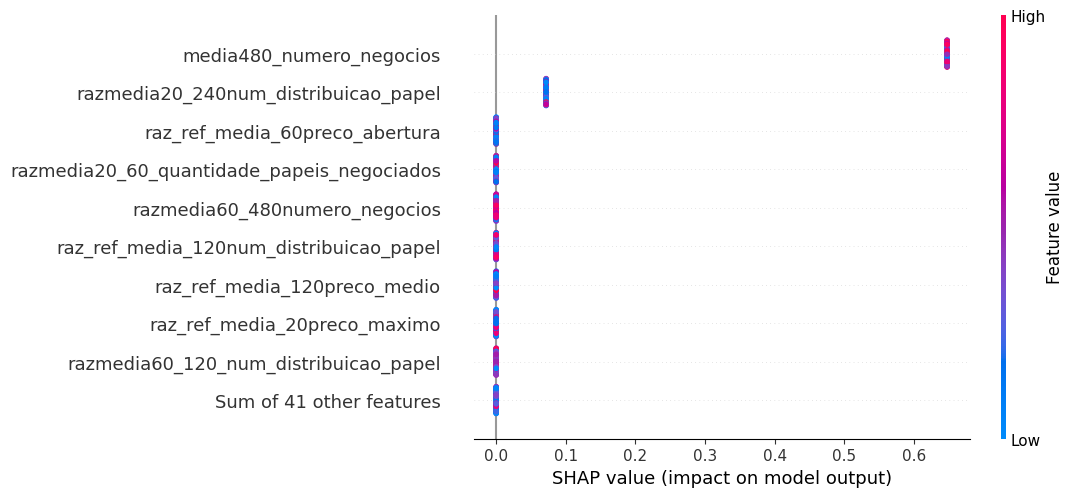

,Feature,Importance
23,razmedia20_240num_distribuicao_papel,4
6,media480_numero_negocios,4
0,quantidade_papeis_negociados,0
37,razmedia20_120_numero_negocios,0
28,razmedia20_480num_distribuicao_papel,0
29,media240_numero_negocios,0
30,raz_ref_media_60num_distribuicao_papel,0
31,razmedia20_120_quantidade_papeis_negociados,0
32,razmedia20_240numero_negocios,0
33,razmedia60_120_quantidade_papeis_negociados,0


In [69]:
# Obter importância das variáveis
feature_importances = modelo_final_charge.feature_importances_
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)
features


explainer = shap.TreeExplainer(modelo_final_charge)
shap_values = explainer(X_test)
# shap.summary_plot(shap_values, X_test)
shap.plots.beeswarm(shap_values,max_display=10)
features.head(10)

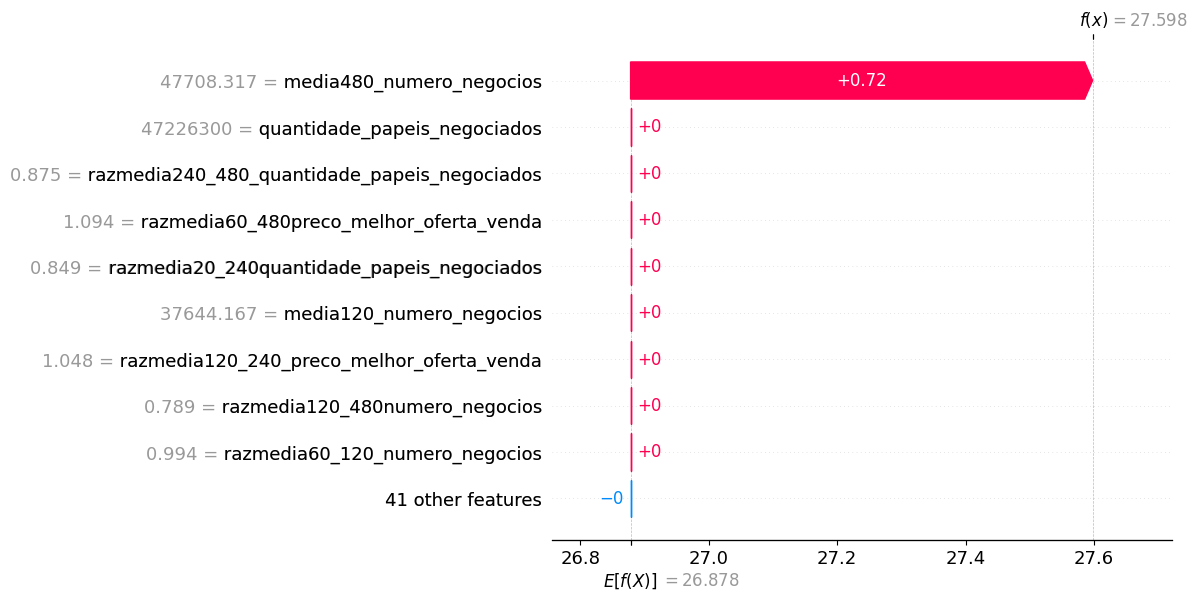

In [28]:
shap.plots.waterfall(shap_values[10],max_display=10)



In [81]:
from scipy.stats import ks_2samp

# Suponha que temos duas amostras
amostra1 = [22, 21, 20, 23, 22, 14, 25]
amostra2 = [22, 11, 0, 23, 22, 24, 24]

estatistica, p_valor = ks_2samp(amostra1, amostra2)
print(f'Estatística KS: {estatistica}, p-valor: {p_valor}')

Estatística KS: 0.2857142857142857, p-valor: 0.9627039627039629


In [144]:
def calculate_psi_categorical(expected, actual, plot=False):
    """
    Calcula o PSI (Population Stability Index) para variáveis categóricas.

    Parameters:
    - expected: array-like (lista, pandas Series, numpy array) → Distribuição de referência (ex.: dados históricos)
    - actual: array-like (lista, pandas Series, numpy array) → Nova distribuição (ex.: novos dados)

    Returns:
    - PSI value (quanto maior, maior a diferença entre as distribuições)
    """

    # Criar DataFrames para contar a frequência das categorias
    expected_counts = pd.Series(expected).value_counts(normalize=True)  # Frequências relativas
    actual_counts = pd.Series(actual).value_counts(normalize=True)

    # Garantir que todas as categorias da distribuição esperada estejam na distribuição atual
    all_categories = set(expected_counts.index).union(set(actual_counts.index))

    # Criar DataFrames com todas as categorias, preenchendo 0 onde não houver valores
    expected_perc = expected_counts.reindex(all_categories, fill_value=0.0001)
    actual_perc = actual_counts.reindex(all_categories, fill_value=0.0001)

    # Calcular PSI
    psi_values = (expected_perc - actual_perc) * np.log(expected_perc / actual_perc)
    psi = sum(psi_values)

    df_plot = pd.DataFrame({"Categoria": list(all_categories),
                            "Esperado": expected_perc.values,
                            "Atual": actual_perc.values})
    df_plot = df_plot.melt(id_vars="Categoria", var_name="Tipo", value_name="Proporção")

    # Plotando o gráfico
    if plot:
        plt.figure(figsize=(10, 5))
        sns.barplot(data=df_plot, x="Categoria", y="Proporção", hue="Tipo", palette=["blue", "red"])
        plt.title(f"Comparação das Distribuições Categóricas (PSI = {psi:.4f})")
        plt.xlabel("Categorias")
        plt.ylabel("Proporção")
        plt.legend(title="Distribuição")
        plt.grid(axis="y", linestyle="--", alpha=0.5)
        plt.show()
    return psi

# Exemplo de uso

def calculate_ks(expected, actual, plot=False):
    """
    Calcula e plota o KS (Kolmogorov-Smirnov) para variáveis contínuas.

    Parameters:
    - expected: array-like (lista, pandas Series, numpy array) → Distribuição de referência (ex.: dados históricos)
    - actual: array-like (lista, pandas Series, numpy array) → Nova distribuição (ex.: novos dados)
    - plot: bool → Se True, exibe o gráfico comparando distribuições

    Returns:
    - KS estatística (float) → Maior diferença entre as distribuições acumuladas
    - p-valor (float) → Probabilidade de que as distribuições sejam semelhantes
    """

    # Aplicar o teste KS
    estatistica_ks, p_valor = ks_2samp(expected, actual)

    if plot:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(expected, label="Esperado", shade=True, color="blue", bw_adjust=1.2)
        sns.kdeplot(actual, label="Atual", shade=True, color="red", bw_adjust=1.2)

        plt.title(f"Comparação KDE das Distribuições (KS = {estatistica_ks:.4f}, p-valor = {p_valor:.4f})")
        plt.xlabel("Valor")
        plt.ylabel("Densidade")
        plt.legend(title="Distribuição")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

    return estatistica_ks, p_valor
resultados_ks = {
    'Variável': [],
    'Estatística KS': [],
    'p-valor': []
}

# ks_stat, p_value = calculate_ks_continuous(data_train['quantidade_papeis_negociados'], data_test['quantidade_papeis_negociados'])
# print(f"Estatística KS: {ks_stat:.4f}, p-valor: {p_value:.4f}")

# psi_result = calculate_psi_categorical(data_train['especificacao_papel'], data_validacao['especificacao_papel'])
# print(f"PSI para variável categórica: {psi_result:.4f}")


for var in selected_features:
    ks_stat, p_value = calculate_ks(data_train[var], data_test[var], plot=False)

    # Armazenar os resultados no dicionário
    resultados_ks['Variável'].append(var)
    resultados_ks['Estatística KS'].append(ks_stat)
    resultados_ks['p-valor'].append(p_value)

# Converter o dicionário para um DataFrame
df_resultados_ks = pd.DataFrame(resultados_ks)


features = df_resultados_ks.sort_values(by='Estatística KS', ascending=False)
features

,Variável,Estatística KS,p-valor
36,media240_quantidade_papeis_negociados,1.000000,1.720448e-132
29,media240_numero_negocios,0.997315,8.862027e-129
26,razmedia240_480_numero_negocios,0.997315,8.862027e-129
42,num_distribuicao_papel,0.980000,5.378934e-115
13,preco_abertura,0.953020,4.828523e-100
48,media60_quantidade_papeis_negociados,0.942282,1.201419e-95
34,preco_maximo,0.939597,1.275224e-94
11,razmedia120_480quantidade_papeis_negociados,0.930201,3.191156e-91
38,razmedia120_480numero_negocios,0.923490,5.911236e-89
10,preco_melhor_oferta_venda,0.921678,1.626356e-88


<ipython-input-137-fbca1b3231e7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(expected_data, label="Esperado", shade=True, color="blue")
<ipython-input-137-fbca1b3231e7>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actual_data, label="Atual", shade=True, color="red")


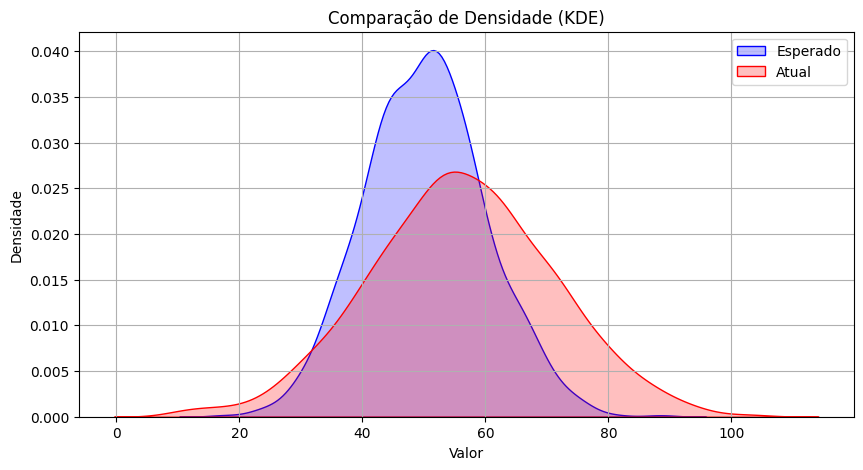

In [137]:
np.random.seed(42)
expected_data = np.random.normal(50, 10, 1000)  # Distribuição esperada
actual_data = np.random.normal(55, 15, 1000)    # Nova distribuição

plt.figure(figsize=(10, 5))
sns.kdeplot(expected_data, label="Esperado", shade=True, color="blue")
sns.kdeplot(actual_data, label="Atual", shade=True, color="red")
plt.title("Comparação de Densidade (KDE)")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.legend()
plt.grid()
plt.show()